# Frozen Lake (QLearning)
## Not slippery

In this section, I will try to explain how you can achieve this taks using the Q-Learning technique.

In [1]:
import gym
import numpy as np
import random
import imageio 
from matplotlib import pyplot as plt

## Context

In [2]:
env = gym.make("FrozenLake-v1", map_name="4x4",render_mode ="rgb_array", is_slippery=False)

In the Frozen Laken problem, the state of the problem is encoded as an 'int' between 0 and 16 if you are on a 4x4 map. This state is the current place of the elf, it is like : "current_row * nrows + current_col (where both the row and col start at 0)".

Because there are 16 squares on the 4x4 map, 16 possible locations, and such number of state is easily processed by QLearning.

In [3]:
state, info = env.reset()
state

0

There are 4 possible actions, going in the 4 possible directions : up, down, left and right.

In [4]:
env.action_space.n

4

Why using QLearning ?
This task has 16 possibles states and 4 actions, the QTable can easily handled such a case. 
The QTbale will be a table of dimension of 16*4, we want to have a table of all the states or each action, so that we now for a specific state what is the right action to take.

In [6]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

## QLearning Algorithm

There will be no explanation in this part, as it is exactly the same algorithm that was explained in the Taxi task. So if you want to have some small explanatio, please refer to the Taxi task.

In [7]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))
achieve_steps = []
have_finsihsed = []

In [8]:
def QLearning(env, learning, discount, epsilon, max_steps, episodes):
    

    for i in range(episodes):
        print("Episodes n°:", i)
        state, info = env.reset()
        done = False
        decay_rate= 0.005

        have_finsihsed.append(False)


        for j in range(max_steps):
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(qtable[state, :])

            new_state, reward, done, truncated, info = env.step(action)

            qtable[state, action] = qtable[state, action] + learning * (reward + discount * np.max(qtable[new_state, :])-qtable[state, action])

            state = new_state

            if reward == 1:
                have_finsihsed[-1] = True
                break

        achieve_steps.append(j)
        epsilon = np.exp(-decay_rate*i)


## Learning Phase

In [9]:
QLearning(env, 
          learning=0.9, 
          discount=0.9, 
          epsilon=1.0, 
          max_steps=100, 
          episodes=10000)

Episodes n°: 0
Episodes n°: 1
Episodes n°: 2
Episodes n°: 3
Episodes n°: 4
Episodes n°: 5
Episodes n°: 6
Episodes n°: 7
Episodes n°: 8
Episodes n°: 9
Episodes n°: 10
Episodes n°: 11
Episodes n°: 12
Episodes n°: 13
Episodes n°: 14
Episodes n°: 15
Episodes n°: 16
Episodes n°: 17
Episodes n°: 18
Episodes n°: 19
Episodes n°: 20
Episodes n°: 21
Episodes n°: 22
Episodes n°: 23
Episodes n°: 24
Episodes n°: 25
Episodes n°: 26
Episodes n°: 27
Episodes n°: 28
Episodes n°: 29
Episodes n°: 30
Episodes n°: 31
Episodes n°: 32
Episodes n°: 33
Episodes n°: 34
Episodes n°: 35
Episodes n°: 36
Episodes n°: 37
Episodes n°: 38
Episodes n°: 39
Episodes n°: 40
Episodes n°: 41
Episodes n°: 42
Episodes n°: 43
Episodes n°: 44
Episodes n°: 45
Episodes n°: 46
Episodes n°: 47
Episodes n°: 48
Episodes n°: 49
Episodes n°: 50
Episodes n°: 51
Episodes n°: 52
Episodes n°: 53
Episodes n°: 54
Episodes n°: 55
Episodes n°: 56
Episodes n°: 57
Episodes n°: 58
Episodes n°: 59
Episodes n°: 60
Episodes n°: 61
Episodes n°: 62
Ep

c:\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episodes n°: 101
Episodes n°: 102
Episodes n°: 103
Episodes n°: 104
Episodes n°: 105
Episodes n°: 106
Episodes n°: 107
Episodes n°: 108
Episodes n°: 109
Episodes n°: 110
Episodes n°: 111
Episodes n°: 112
Episodes n°: 113
Episodes n°: 114
Episodes n°: 115
Episodes n°: 116
Episodes n°: 117
Episodes n°: 118
Episodes n°: 119
Episodes n°: 120
Episodes n°: 121
Episodes n°: 122
Episodes n°: 123
Episodes n°: 124
Episodes n°: 125
Episodes n°: 126
Episodes n°: 127
Episodes n°: 128
Episodes n°: 129
Episodes n°: 130
Episodes n°: 131
Episodes n°: 132
Episodes n°: 133
Episodes n°: 134
Episodes n°: 135
Episodes n°: 136
Episodes n°: 137
Episodes n°: 138
Episodes n°: 139
Episodes n°: 140
Episodes n°: 141
Episodes n°: 142
Episodes n°: 143
Episodes n°: 144
Episodes n°: 145
Episodes n°: 146
Episodes n°: 147
Episodes n°: 148
Episodes n°: 149
Episodes n°: 150
Episodes n°: 151
Episodes n°: 152
Episodes n°: 153
Episodes n°: 154
Episodes n°: 155
Episodes n°: 156
Episodes n°: 157
Episodes n°: 158
Episodes n°: 1

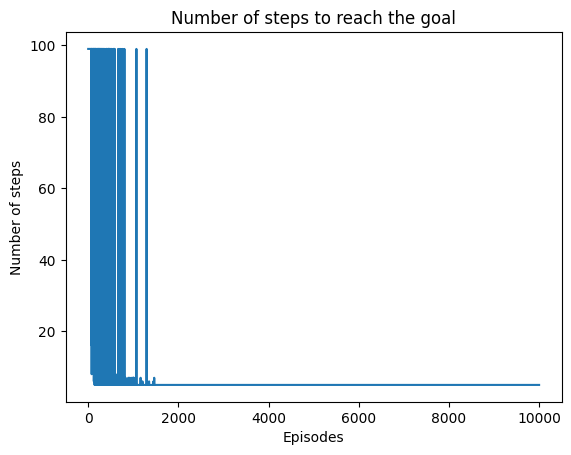

In [10]:
plt.plot(achieve_steps)
plt.title('Number of steps to reach the goal')
plt.xlabel('Episodes')
plt.ylabel('Number of steps')
plt.show()

In [11]:
have_finsihsed = np.array(have_finsihsed)
print("Sucess rate:", np.sum(have_finsihsed) / len(have_finsihsed))

Sucess rate: 0.9761


Because the FrozenLake is a very small problem, the convergence appear very quickly and doesn't seem to change after reaching this state. This indicates that Q-Learning method is the perfect solution to solve this task.

## Create the GIF

In [13]:
env.close()
env = gym.make("FrozenLake-v1", map_name="4x4",render_mode ="rgb_array", is_slippery=False)

state,info = env.reset()

images = []


while 1>0:

    action = np.argmax(qtable[state,:])
    new_state, reward, done, trunc, info = env.step(action)
    frame = env.render()
    images.append(frame)
    state= new_state

    if done == True:
        break

env.close()
imageio.mimsave('img/FrozenLake.gif', images, fps=59)

c:\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
